In [1]:
import datetime
today = datetime.date.today()
date = str(today)

url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'UK', 'US', 'KR', 'JP', 'CN']

def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['GeoId'] == country][['DateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

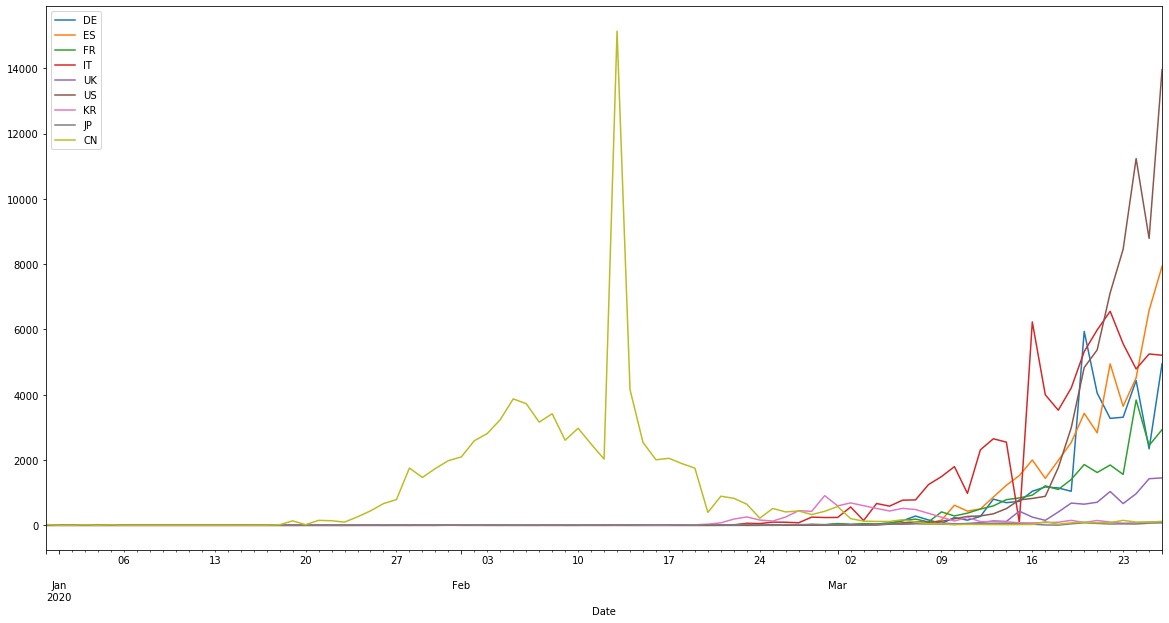

In [3]:
cases = rawData(data, 'Cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 10))

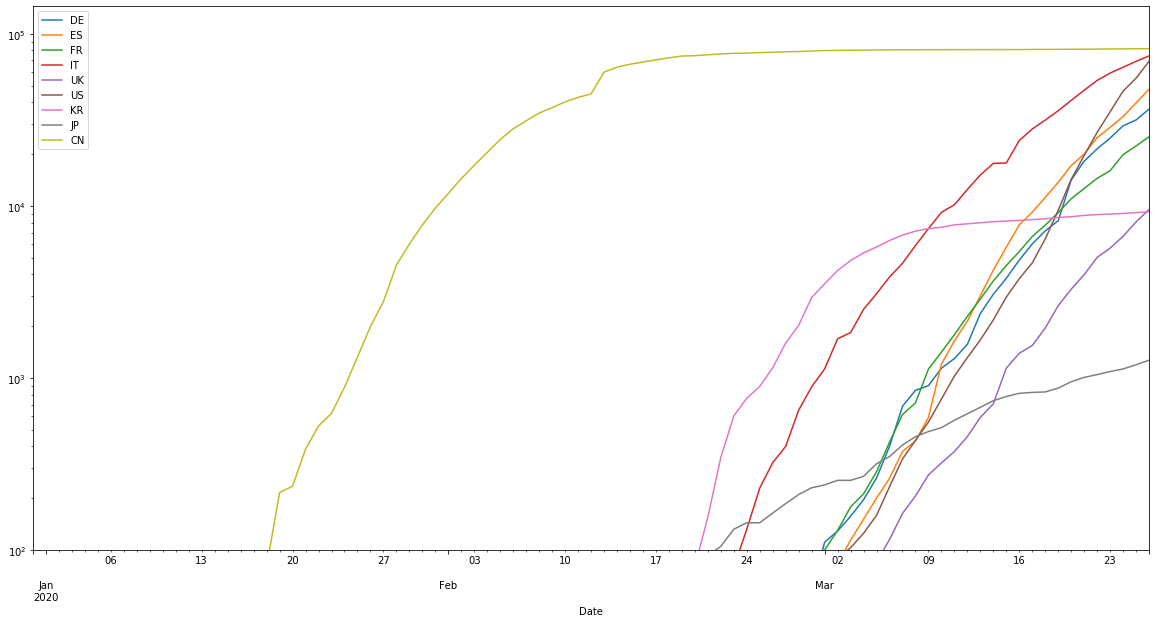

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 10), ylim=(100, None))

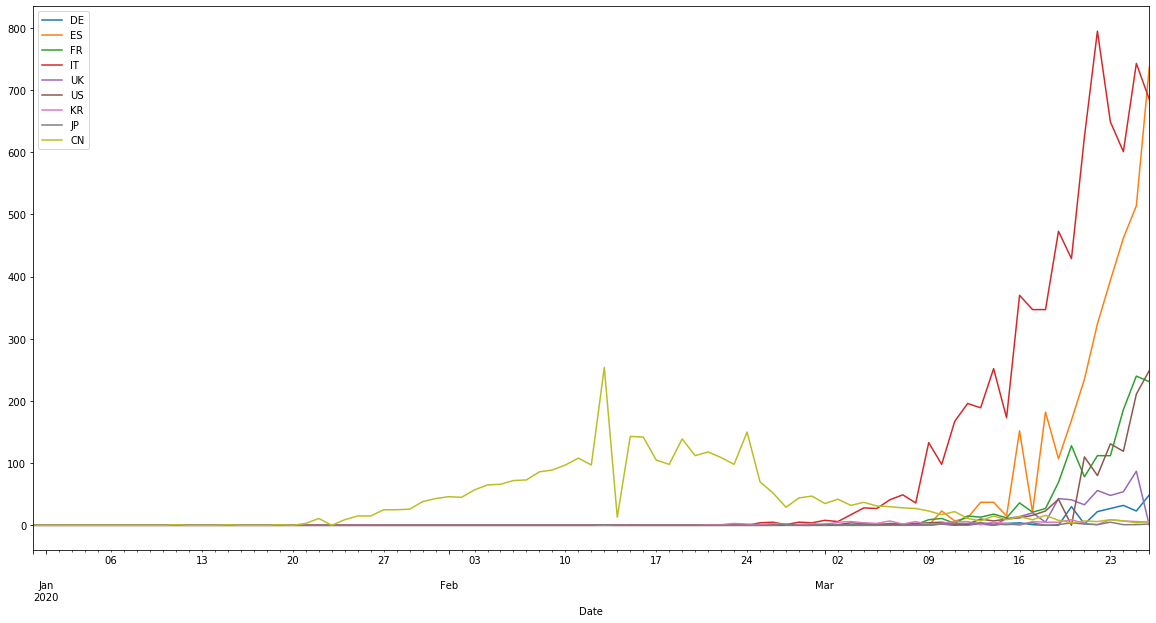

In [5]:
deaths = rawData(data, 'Deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 10))

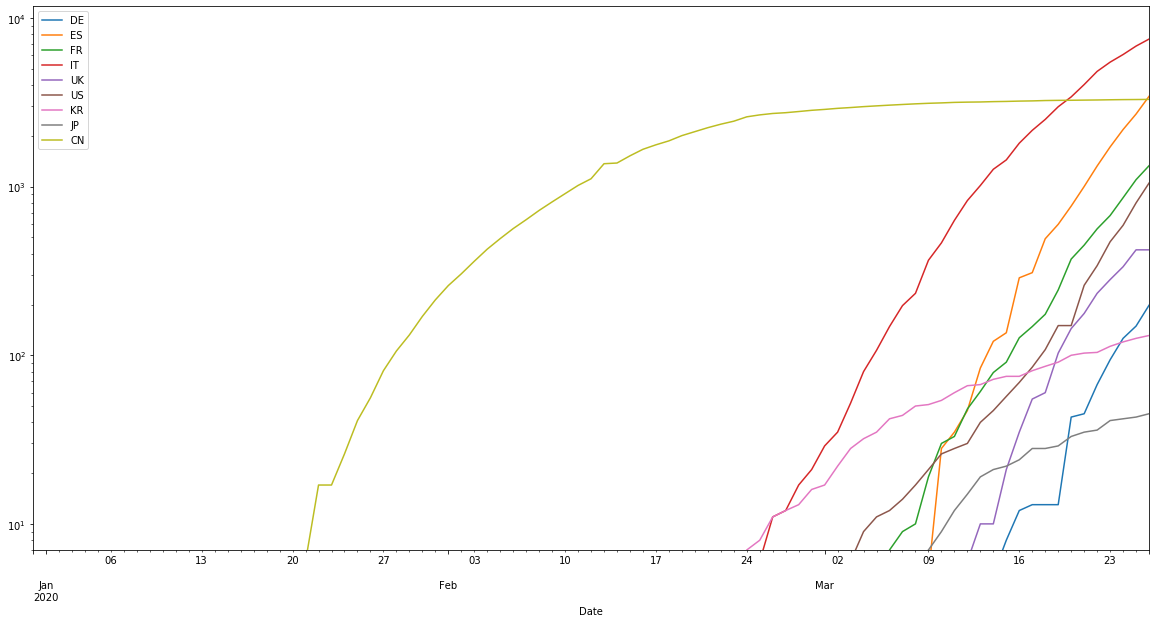

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 10), ylim=(7, None))

In [7]:
cases

,Date,DE,ES,FR,IT,UK,US,KR,JP,CN
86,2019-12-31,0,0,0,0,0,0,0,0,27
85,2020-01-01,0,0,0,0,0,0,0,0,0
84,2020-01-02,0,0,0,0,0,0,0,0,0
83,2020-01-03,0,0,0,0,0,0,0,0,17
82,2020-01-04,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4,2020-03-22,3276,4946,1847,6557,1035,7123,98,39,83
3,2020-03-23,3311,3646,1559,5560,665,8459,64,43,150
2,2020-03-24,4438,4517,3838,4789,967,11236,76,39,99
1,2020-03-25,2342,6584,2446,5249,1427,8789,100,65,99


In [8]:
sumCases

,DE,ES,FR,IT,UK,US,KR,JP,CN
Date,,,,,,,,,
2019-12-31,0,0,0,0,0,0,0,0,27
2020-01-01,0,0,0,0,0,0,0,0,27
2020-01-02,0,0,0,0,0,0,0,0,27
2020-01-03,0,0,0,0,0,0,0,0,44
2020-01-04,0,0,0,0,0,0,0,0,44
...,...,...,...,...,...,...,...,...,...
2020-03-22,21463,24926,14459,53578,5018,26747,8897,1046,81499
2020-03-23,24774,28572,16018,59138,5683,35206,8961,1089,81649
2020-03-24,29212,33089,19856,63927,6650,46442,9037,1128,81748


In [9]:
deaths

,Date,DE,ES,FR,IT,UK,US,KR,JP,CN
86,2019-12-31,0,0,0,0,0,0,0,0,0
85,2020-01-01,0,0,0,0,0,0,0,0,0
84,2020-01-02,0,0,0,0,0,0,0,0,0
83,2020-01-03,0,0,0,0,0,0,0,0,0
82,2020-01-04,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4,2020-03-22,22,324,112,795,56,80,1,1,6
3,2020-03-23,27,394,112,649,48,131,9,5,9
2,2020-03-24,32,462,186,601,54,119,7,1,7
1,2020-03-25,23,514,240,743,87,211,6,1,4


In [10]:
sumDeaths

,DE,ES,FR,IT,UK,US,KR,JP,CN
Date,,,,,,,,,
2019-12-31,0,0,0,0,0,0,0,0,0
2020-01-01,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-03-22,67,1326,562,4827,233,340,104,36,3267
2020-03-23,94,1720,674,5476,281,471,113,41,3276
2020-03-24,126,2182,860,6077,335,590,120,42,3283
